In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Wilkinson polynomial definition

$p(x)=\prod_{i=1}^{20}(x-i)$ - looks yammy, isn't it?

Look at all coefficients:

In [2]:
#you may just use np.poly(roots)
#here I calculate coefficients iteratively
def wilkinoson_like_coefs(degree: int = 20):
    coefs = [-1, 1]
    if degree == 1: return coefs
    for root in range(2, degree + 1):
        #deg==root in our case
        for coef_ind in range(len(coefs) - 1, 0, -1):
            coefs[coef_ind] = coefs[coef_ind - 1] - coefs[coef_ind] * root
        coefs[0] *= -root
        coefs.append(1) # add last coef as 1
    # coefs = np.array(coefs, dtype=np.float64)
    return coefs

In [3]:
coefs = np.array(wilkinoson_like_coefs(), dtype=np.float64)
roots = np.roots(coefs[::-1])

# Experiment from the book

Let's shift all polynomial coefs as:

$a_k = a_k(1+10^{-10}r_k)$, where $r_k$ is sampled from $\mathcal{N}(0,1)$

In [4]:
coefs = np.array(wilkinoson_like_coefs(), dtype=np.float64)
roots = np.roots(coefs[::-1])

In [5]:
roots

array([19.99980929, 19.00190982, 17.99092135, 17.02542715, 15.94628672,
       15.0754938 , 13.91475559, 13.07431403, 11.95328325, 11.02502293,
        9.99041304,  9.00291529,  7.99935583,  7.000102  ,  5.99998925,
        5.00000067,  3.99999998,  3.        ,  2.        ,  1.        ])

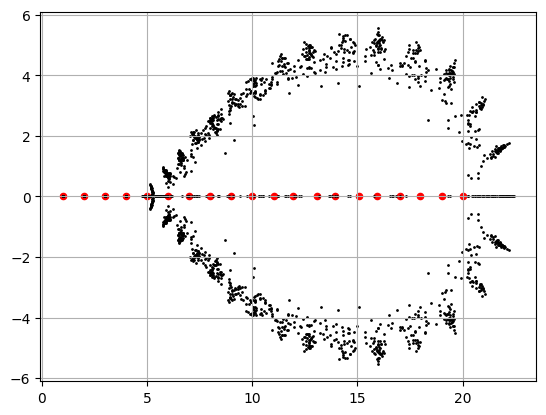

In [6]:
np.random.seed(314) # for reproducibility
roots = roots.astype(np.complex256)
#plot initial roots, big red dots as initial roots
plt.scatter([root.real for root in roots], [root.imag for root in roots], s=20, color='red')
#start the experiment
for exp in range(100):
    new_coefs = np.copy(coefs)
    for i in range(new_coefs.shape[0]):
        #reproduce an experiment from book
        new_coefs[i] += new_coefs[i] * 1e-10 * np.random.standard_normal()
    roots = np.roots(new_coefs[::-1])
    roots = roots.astype(np.complex256)
    #small black dots as other roots
    plt.scatter([root.real for root in roots], [root.imag for root in roots], s=1, color='black')
plt.grid()
plt.show()

Why we get such a mess?
Well, let's obtain relative conditional numbers for any polynomial root $x_j$ when polynomial coefficient $a_i$ is changed as $a_i=a_i+\delta a_i$:

$\kappa(x_j|\delta a_i)=(\frac{\delta x_j}{x_j})/(\frac{\delta a_i}{a_i})$.

For this we need to know $\delta x_j$. Let's denote new polynomial with $a_i=a_i+\delta a_i$ as $\hat{p}(x)$

$\hat{p}(x_j+\delta x_j)=p'(x_j)\delta x_j$ from the one side (Taylor series near $x_j$), and

$\hat{p}(x_j+\delta x_j)=\delta a_i x_j^i$ from the other side (highest term contatining small quantity).

By puting equations together we will find $\delta x_j$ and then we will get:

$\kappa(x_j|\delta a_i)=\frac{|a_i x_j^{i-1}|}{|p'(x_j)|}$.